# Veri Hazırlama

Kütüphaneler

In [123]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
import os
import pandas as pd
from torch.utils.data import (Dataset, DataLoader)
from skimage import io
import time

import warnings

warnings.filterwarnings("ignore")


Veri

In [124]:
class veri(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return(image, y_label)


Veri Hazırlama

In [125]:

dataset = veri(csv_file=r"../../veriler/f1_classification/f111.csv", root_dir=r"../../veriler/f1_classification", transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Resize(size=(28, 28)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]))


In [126]:
dataset


Veri Ön İşleme

In [127]:
train_set, test_set = torch.utils.data.random_split(dataset, [200, 79])
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=False)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)


In [128]:
train_set


In [129]:
test_set


Veri Görselleştirme

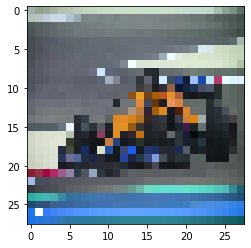

Mclaren
torch.Size([1, 3, 28, 28])


In [130]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 1

classes = ["Ferrari", "Mclaren", "Mercedes", "Redbull"]


def imshow(img):

    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.size())


Model Mimarisini Oluşturma

In [131]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels=3,  out_channels=4,  kernel_size=(5, 5))
        self.conv2 = nn.Conv2d(
            in_channels=4,  out_channels=8,  kernel_size=(3, 3))
        self.conv3 = nn.Conv2d(
            in_channels=8,  out_channels=16, kernel_size=(2, 2))
        self.conv4 = nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=(2, 2))

        self.max = nn.MaxPool2d(kernel_size=(2, 2))
        self.func = nn.ELU()
        self.func1 = nn.ReLU()

        self.fullyconnect1 = nn.Linear(in_features=32, out_features=50)
        self.fullyconnect2 = nn.Linear(in_features=50, out_features=50)
        self.fullyconnect3 = nn.Linear(in_features=50, out_features=100)
        self.fullyconnect4 = nn.Linear(in_features=100, out_features=4)

    def forward(self, x):

        x = self.conv1(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv2(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv3(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv4(x)
        x = self.func(x)
        
        x = x.view(x.size(0), -1)  # flaten
        
        x = self.fullyconnect1(x)
        x = self.func(x)
        x = self.fullyconnect2(x)
        x = self.func(x)
        x = self.fullyconnect3(x)
        x = self.func(x)
        
        x = self.fullyconnect4(x)
        
        return x


Modelin Eğitimi

In [132]:
start = time.time()

model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

for i in range(epoch):
    for j, (images, label) in enumerate(train_loader):

        optimizer.zero_grad()
        out = model(images)
        loss = error(out, label)

        loss.backward()
        optimizer.step()

        print("Epoch [{}/{}, loss:{:.4f}]".format(i+1, j+1, loss.item()))

end = time.time()
print("Süre", end-start)


Epoch [1/1, loss:1.4268]
Epoch [1/2, loss:1.4202]
Epoch [1/3, loss:1.4465]
Epoch [1/4, loss:1.3998]
Epoch [1/5, loss:1.3870]
Epoch [1/6, loss:1.3732]
Epoch [1/7, loss:1.3566]
Epoch [1/8, loss:1.3446]
Epoch [1/9, loss:1.3272]
Epoch [1/10, loss:1.3843]
Epoch [1/11, loss:1.4618]
Epoch [1/12, loss:1.4630]
Epoch [1/13, loss:1.3894]
Epoch [1/14, loss:1.3884]
Epoch [1/15, loss:1.3817]
Epoch [1/16, loss:1.4611]
Epoch [1/17, loss:1.4571]
Epoch [1/18, loss:1.4715]
Epoch [1/19, loss:1.2789]
Epoch [1/20, loss:1.2779]
Epoch [1/21, loss:1.3682]
Epoch [1/22, loss:1.4448]
Epoch [1/23, loss:1.3620]
Epoch [1/24, loss:1.2711]
Epoch [1/25, loss:1.4988]
Epoch [1/26, loss:1.2623]
Epoch [1/27, loss:1.2646]
Epoch [1/28, loss:1.2519]
Epoch [1/29, loss:1.4494]
Epoch [1/30, loss:1.2408]
Epoch [1/31, loss:1.4502]
Epoch [1/32, loss:1.4472]
Epoch [1/33, loss:1.5371]
Epoch [1/34, loss:1.3809]
Epoch [1/35, loss:1.4280]
Epoch [1/36, loss:1.4187]
Epoch [1/37, loss:1.3882]
Epoch [1/38, loss:1.4120]
Epoch [1/39, loss:1.2

Modelin Testi

In [133]:
def dogruluk (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # test modu 

    with torch.no_grad(): # gradient (türev hesaplama)
        for x,y in loader:
            tahmin = model(x) # images
            _,pred = tahmin.max(1)
            num_correct += (pred==y).sum()
            num_samples += (pred.size(0))

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()


In [134]:
print("train doğruluk:")
dogruluk(train_loader, model)

print("test doğruluk:")
dogruluk(test_loader, model)

train doğruluk:
Got 153 / 200 with accuracy 76.50
test doğruluk:
Got 61 / 79 with accuracy 77.22


Modelin Eğitim ve Testi

In [135]:
start = time.time()
model = Net()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)

        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.5086 Accuracy: 35.4430 Error: 64.5570
iteration:  200 Loss: 0.5581 Accuracy: 58.2278 Error: 41.7722
iteration:  300 Loss: 0.6320 Accuracy: 59.4937 Error: 40.5063
iteration:  400 Loss: 0.3969 Accuracy: 63.2911 Error: 36.7089
iteration:  500 Loss: 0.8068 Accuracy: 65.8228 Error: 34.1772
iteration:  600 Loss: 0.3740 Accuracy: 68.3544 Error: 31.6456
iteration:  700 Loss: 0.4710 Accuracy: 74.6835 Error: 25.3165
iteration:  800 Loss: 0.2469 Accuracy: 75.9494 Error: 24.0506
iteration:  900 Loss: 0.9087 Accuracy: 74.6835 Error: 25.3165
iteration: 1000 Loss: 0.2834 Accuracy: 75.9494 Error: 24.0506
iteration: 1100 Loss: 0.0608 Accuracy: 81.0127 Error: 18.9873
iteration: 1200 Loss: 0.2407 Accuracy: 74.6835 Error: 25.3165
iteration: 1300 Loss: 0.0267 Accuracy: 83.5443 Error: 16.4557
iteration: 1400 Loss: 0.0952 Accuracy: 79.7468 Error: 20.2532
iteration: 1500 Loss: 0.0173 Accuracy: 81.0127 Error: 18.9873
iteration: 1600 Loss: 0.0550 Accuracy: 81.0127 Error: 18.9873
iteratio

In [136]:
start = time.time()
model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)

        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.4722 Accuracy: 27.8481 Error: 72.1519
iteration:  200 Loss: 1.4101 Accuracy: 25.3165 Error: 74.6835
iteration:  300 Loss: 1.2868 Accuracy: 36.7089 Error: 63.2911
iteration:  400 Loss: 0.4800 Accuracy: 36.7089 Error: 63.2911
iteration:  500 Loss: 0.3051 Accuracy: 46.8354 Error: 53.1646
iteration:  600 Loss: 0.0977 Accuracy: 45.5696 Error: 54.4304
iteration:  700 Loss: 0.2256 Accuracy: 50.6329 Error: 49.3671
iteration:  800 Loss: 0.1284 Accuracy: 50.6329 Error: 49.3671
iteration:  900 Loss: 0.3188 Accuracy: 53.1646 Error: 46.8354
iteration: 1000 Loss: 0.1226 Accuracy: 53.1646 Error: 46.8354
iteration: 1100 Loss: 0.3328 Accuracy: 51.8987 Error: 48.1013
iteration: 1200 Loss: 0.1022 Accuracy: 54.4304 Error: 45.5696
iteration: 1300 Loss: 0.3168 Accuracy: 51.8987 Error: 48.1013
iteration: 1400 Loss: 0.0855 Accuracy: 54.4304 Error: 45.5696
iteration: 1500 Loss: 0.2991 Accuracy: 51.8987 Error: 48.1013
iteration: 1600 Loss: 0.0723 Accuracy: 58.2278 Error: 41.7722
iteratio